In [1]:
import torch

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

### Drawing the data points

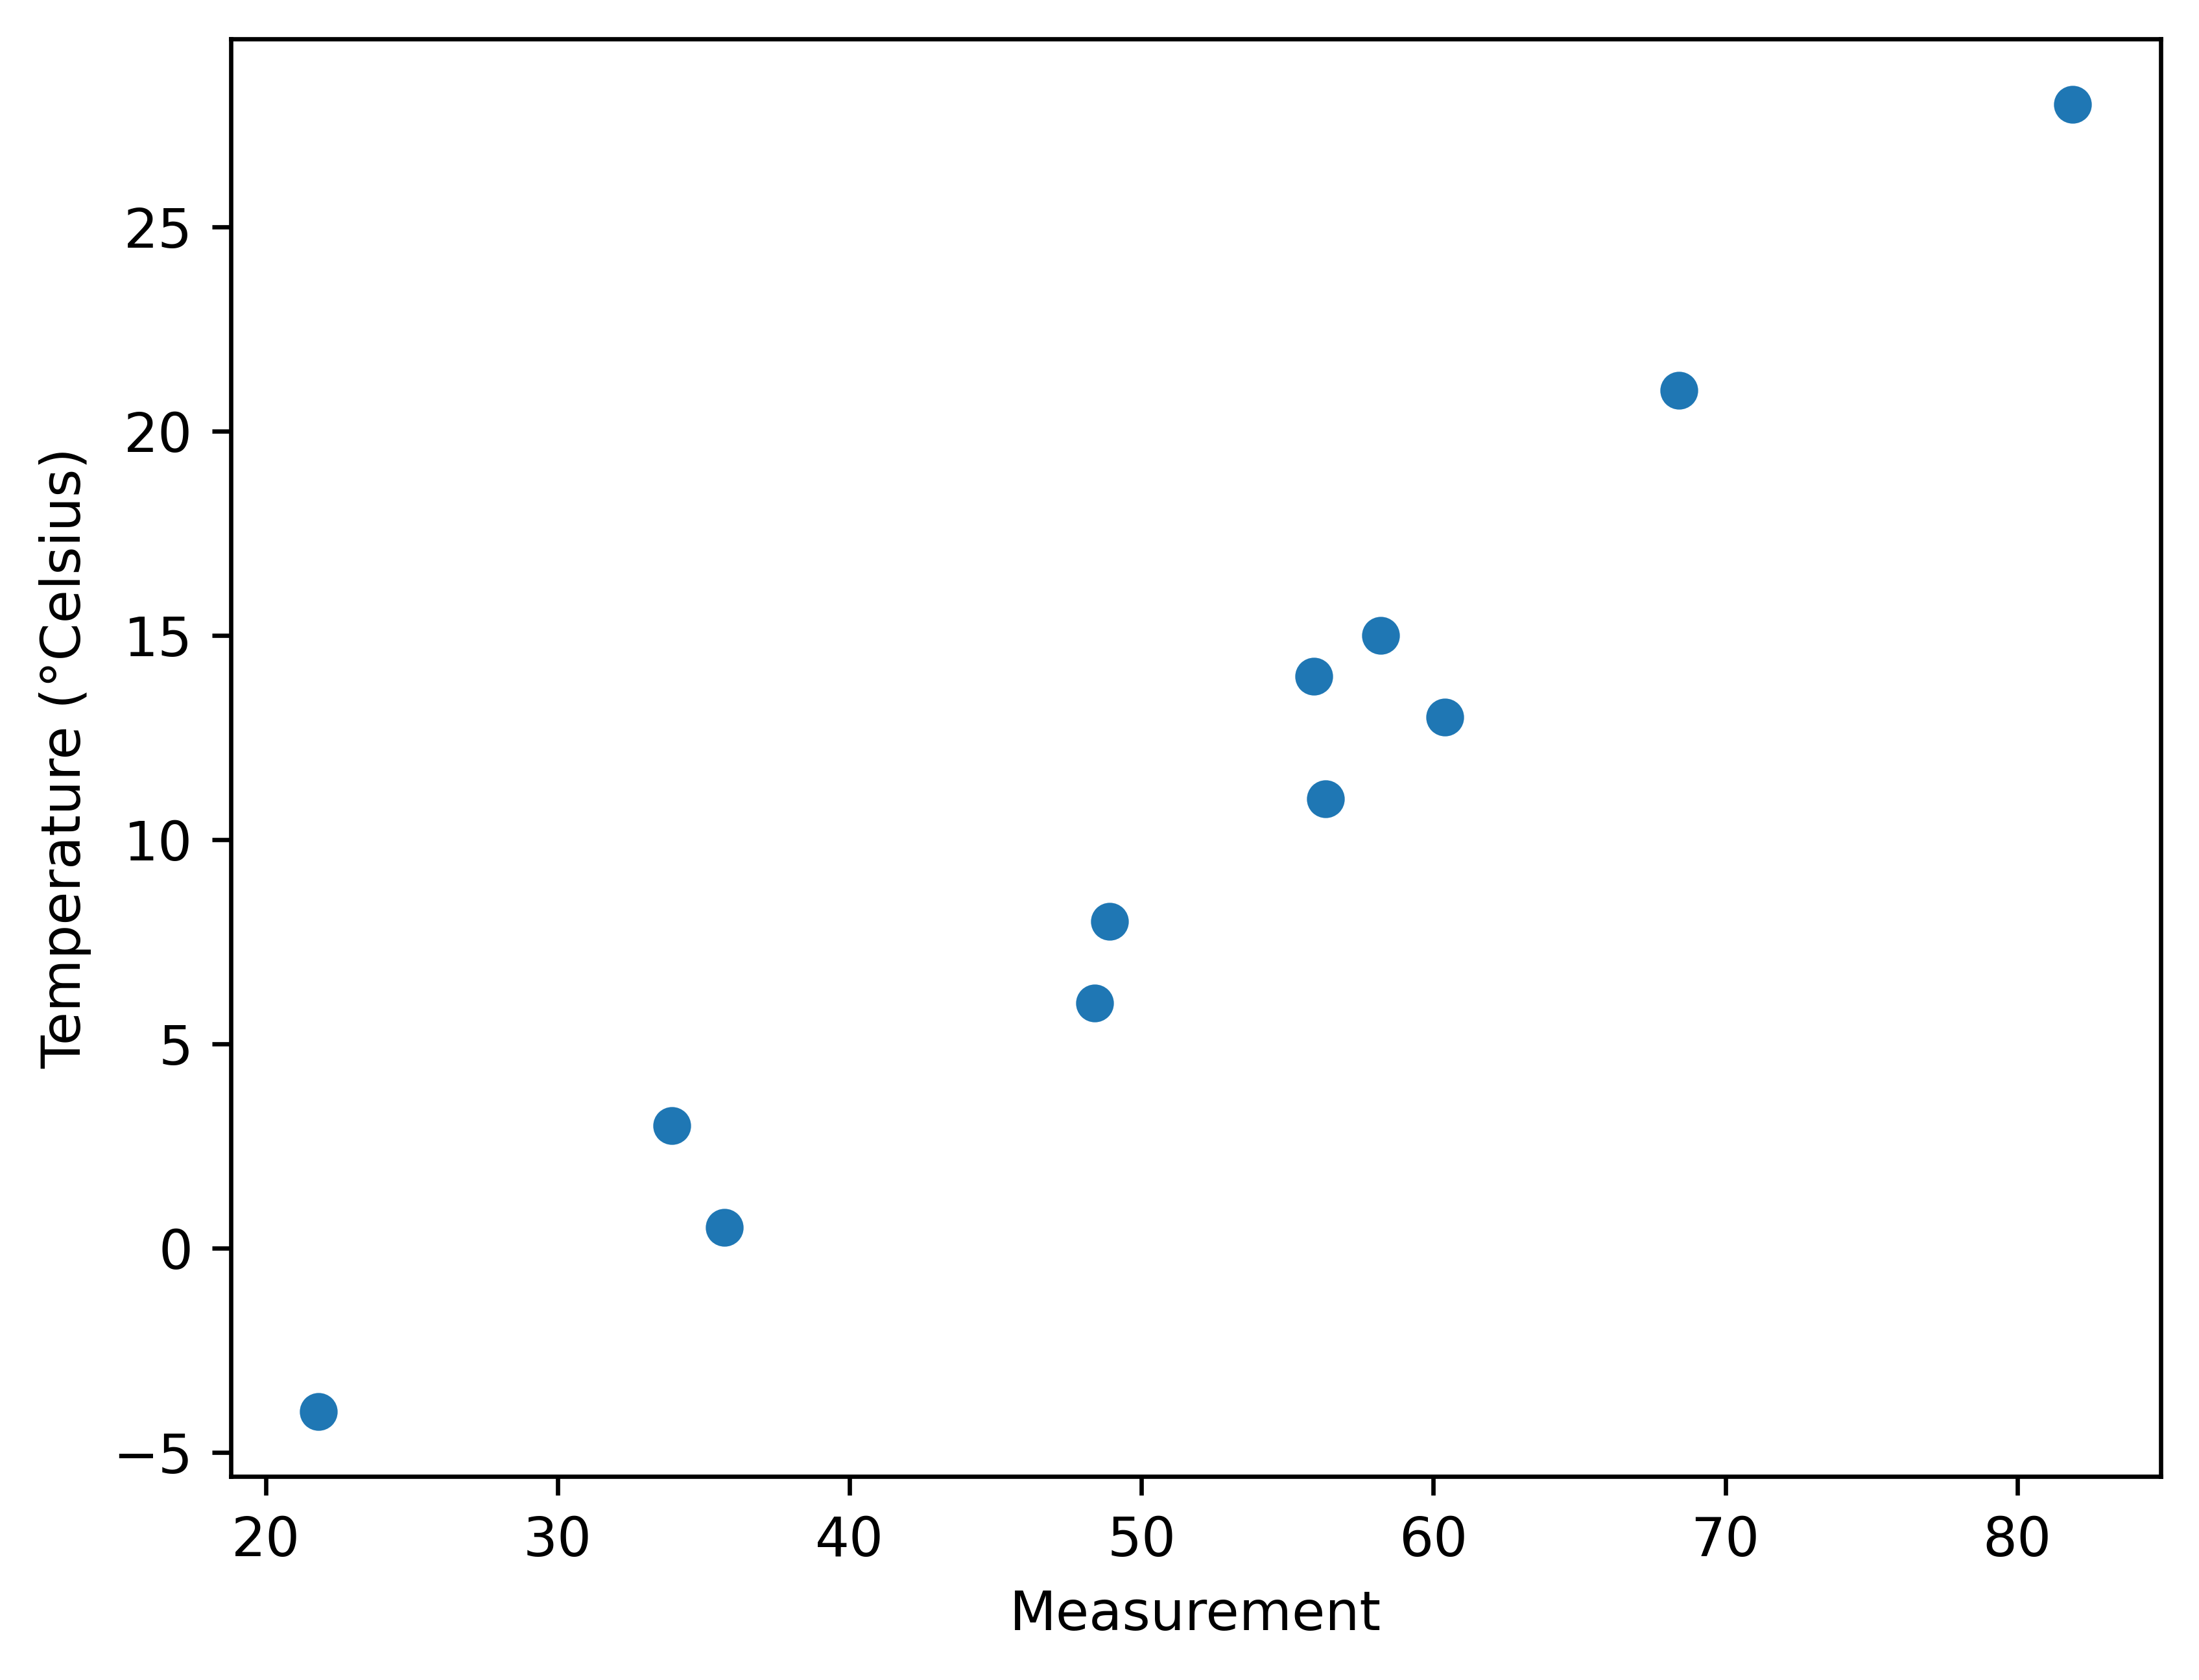

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure(dpi=600)
plt.xlabel("Measurement")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

plt.savefig("temp_data_plot.png", format="png")

The linear model y = w * x + b

In [4]:
def model(t_u, w, b):
    return w * t_u + b

The loss function

In [5]:
def loss_fn(t_p, t_c):
    squared_diff = (t_p - t_c) ** 2
    return squared_diff.mean()

In [6]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [7]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8846)

In [9]:
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2 * delta)

loss_rate_of_change_w

tensor(4517.2979)

In [10]:
learning_rate = 0.01

w = w - learning_rate * loss_rate_of_change_w

In [11]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (2 * delta)

loss_rate_of_change_b

tensor(-4602.5000)

In [13]:
b = b - learning_rate * loss_rate_of_change_b

Derivative of the loss compared to its input (tp)

In [14]:
def dloss_fn(tp, tc):
    dsq_diffs = 2 * (tp - tc) / tp.size(0)
    return dsq_diffs

Derivative of the model compared to its inputs

In [15]:
def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [17]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])